## This model is trained under different data sets from main.ipnyb 


In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.image import imread 
import cv2 
from matplotlib import image as mpimg
import random 
from os import listdir
from sklearn.preprocessing import LabelBinarizer 
from keras.preprocessing import image 
from keras.preprocessing.image import img_to_array , array_to_img
from keras.optimizers import Adam 
from keras.models import Sequential 
from keras.layers import Conv2D , MaxPooling2D , Activation , Flatten , Dropout , Dense 
from sklearn.model_selection import train_test_split 



2024-01-21 15:30:39.850418: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-21 15:30:39.889371: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-21 15:30:40.001552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 15:30:40.001617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 15:30:40.007777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
os.listdir()

['main.ipynb', '.git', '.gitignore', 'a', 'images', 'main2.ipynb']

In [3]:
os.listdir('images')[0]

'001.Black_footed_Albatross'

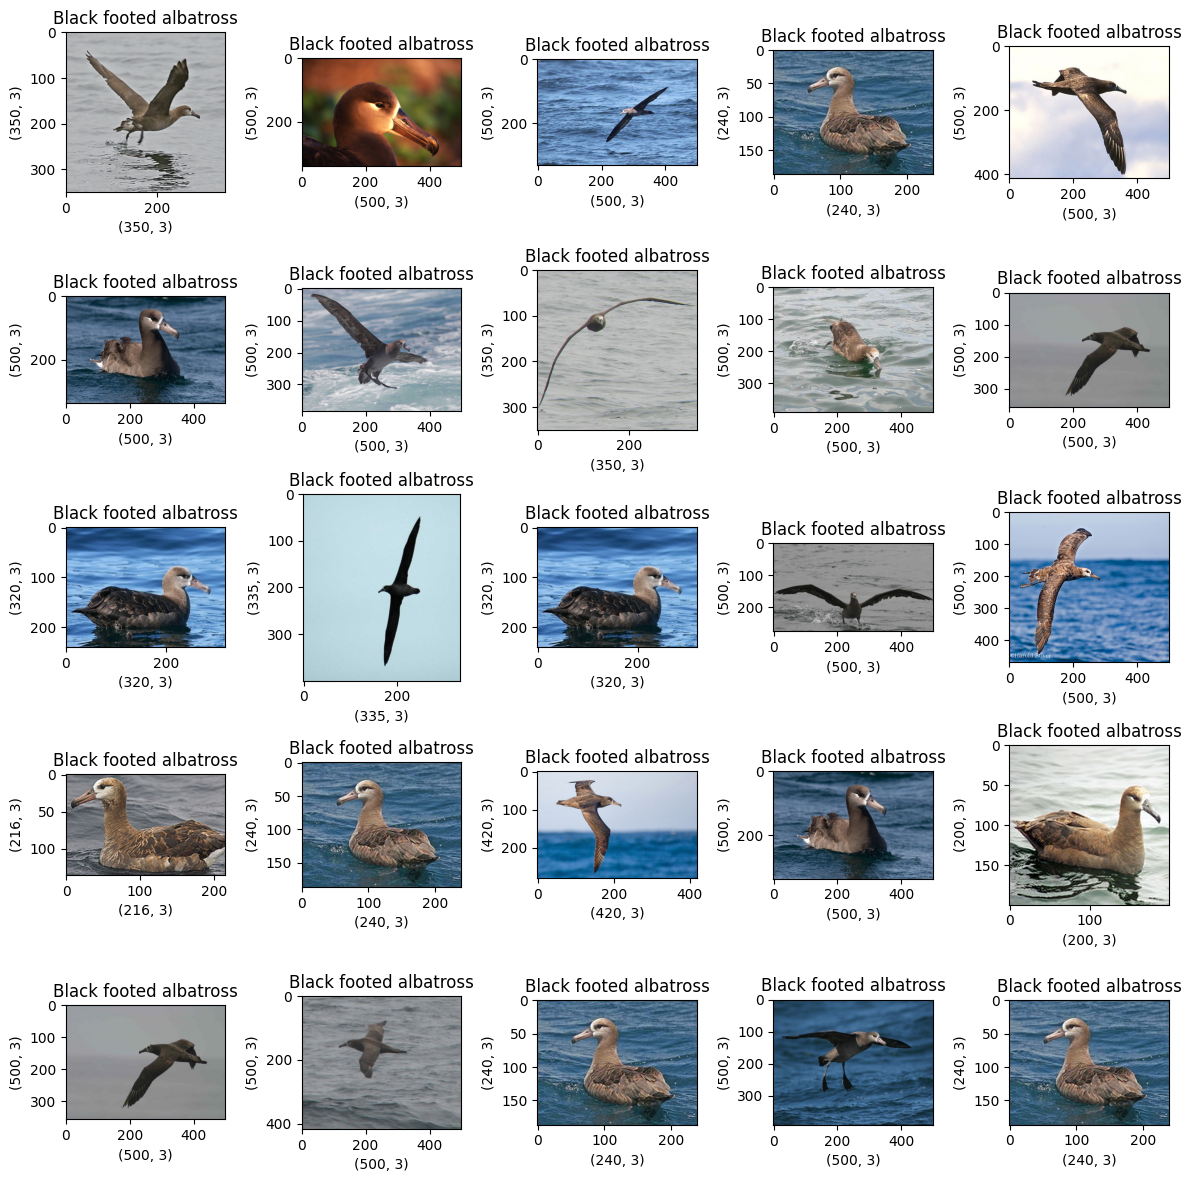

In [4]:
#plotting some images from 'black footed albatross 
import random 
plt.figure(figsize = (12  , 12 ))
black_footed_bird_path = 'images/001.Black_footed_Albatross/'
for i in range(1 , 26):
    plt.subplot(5  , 5 , i)
    plt.tight_layout()
    rand_img = imread(black_footed_bird_path + random.choice(listdir(black_footed_bird_path)))
    plt.imshow(rand_img)
    plt.title("Black footed albatross")
    plt.xlabel(rand_img[0].shape)
    plt.ylabel(rand_img[1].shape)

In [5]:
root =  '/home/ujjwal/ujjwal/Bird Species Prediction/' 
species_dir_list = listdir('/home/ujjwal/ujjwal/Bird Species Prediction/images/')
image_list = [] #emply images path list 
label_list = []#empty label list 
species_dir_list


['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

In [6]:


for  species_dir in species_dir_list[:50]:
    species_dir_path = root + 'images/' + species_dir 
    for files in listdir(species_dir_path):
        file_path = species_dir_path +'/' +  files 
        image_read = cv2.imread(file_path)
        image_array = img_to_array(image_read)
        image_list.append(image_array)
        label_list.append(species_dir)
       

    
       
    

In [7]:
label_counts = pd.DataFrame(label_list).value_counts() #this is what balanced datasets looks like
label_counts

001.Black_footed_Albatross       60
021.Eastern_Towhee               60
002.Laysan_Albatross             60
027.Shiny_Cowbird                60
029.American_Crow                60
030.Fish_Crow                    60
031.Black_billed_Cuckoo          60
035.Purple_Finch                 60
036.Northern_Flicker             60
038.Great_Crested_Flycatcher     60
040.Olive_sided_Flycatcher       60
041.Scissor_tailed_Flycatcher    60
042.Vermilion_Flycatcher         60
044.Frigatebird                  60
045.Northern_Fulmar              60
046.Gadwall                      60
047.American_Goldfinch           60
048.European_Goldfinch           60
049.Boat_tailed_Grackle          60
025.Pelagic_Cormorant            60
026.Bronzed_Cowbird              60
013.Bobolink                     60
014.Indigo_Bunting               60
004.Groove_billed_Ani            60
010.Red_winged_Blackbird         60
011.Rusty_Blackbird              60
050.Eared_Grebe                  60
028.Brown_Creeper           

In [8]:
image_list[0].shape

(416, 500, 3)

In [15]:
image_list[0].shape

(416, 500, 3)

In [13]:
x_train , x_test , y_train , y_test   = train_test_split(image_list ,label_list , test_size= 0.2 , random_state = 42  )

In [18]:
x_train = np.array(x_train , dtype = np.float16 ) / 255
x_test = np.array(x_test ,dtype = np.float16 ) / 255 
x_train = x_train.reshape(-1 , 416, 500 , 3 )
x_test  = x_test.reshape(-1 , 416 , 500)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2311,) + inhomogeneous part.